# **Lab Sheet 01**

---



---



In [1]:
!pip install numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

Au_nanoparticle_dataset.csv  online_store_customer_data.csv  sample_data


# **Task 1**

---



**Q1**

In [3]:
arr_4x4 = np.random.exponential(scale=1.0, size=(4,4))
print(arr_4x4)

[[0.22458628 0.54778756 0.28054069 0.71672401]
 [0.09212522 3.4586989  0.57869259 3.63598734]
 [1.32550003 1.24549539 1.43654533 0.6771537 ]
 [0.57390952 0.50456718 0.02734142 0.55933255]]


**Q2**

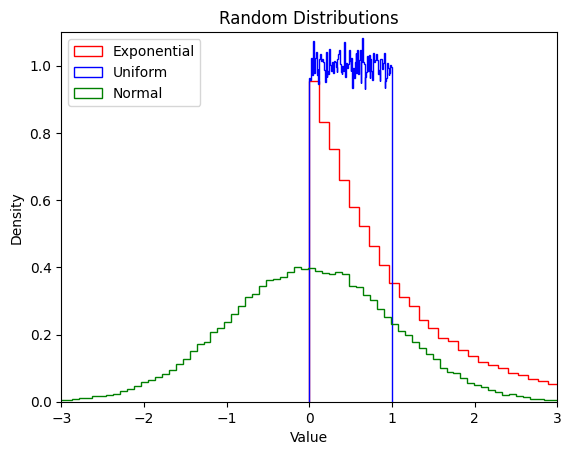

In [4]:
exp_data = np.random.exponential(scale=1.0, size=100000)
uniform_data = np.random.rand(100000)
normal_data = np.random.randn(100000)

plt.hist(exp_data, bins=100, density=True, histtype='step', color='red', label='Exponential')
plt.hist(uniform_data, bins=100, density=True, histtype='step', color='blue', label='Uniform')
plt.hist(normal_data, bins=100, density=True, histtype='step', color='green', label='Normal')

plt.axis([-3, 3, 0, 1.1])
plt.legend(loc="upper left")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

**Q3**

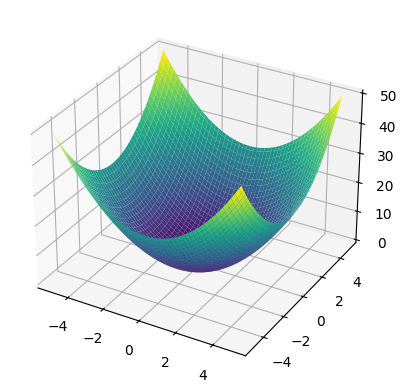

In [5]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

**Q4**

In [6]:
df_customers = pd.read_csv("online_store_customer_data.csv")
print(df_customers.columns)

Index(['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status',
       'State_names', 'Segment', 'Employees_status', 'Payment_method',
       'Referal', 'Amount_spent'],
      dtype='object')


In [7]:
features = ["Age", "Amount_spent"]

In [8]:
pearson_corr = df_customers[features].corr(method='pearson')
spearman_corr = df_customers[features].corr(method='spearman')

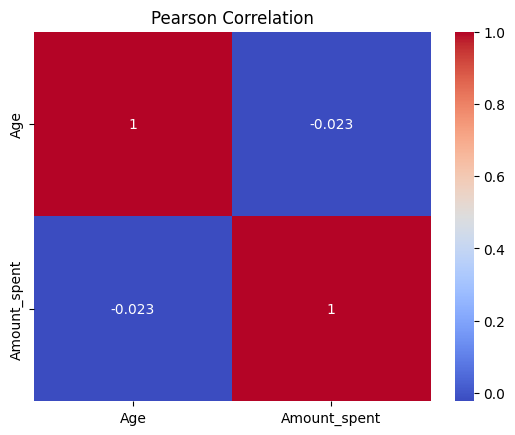

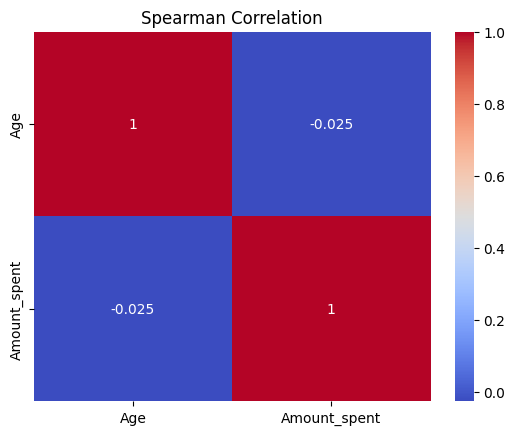

In [9]:
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation")
plt.show()

sns.heatmap(spearman_corr, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation")
plt.show()

# **Task 2**

---



In [10]:
df_au = pd.read_csv("Au_nanoparticle_dataset.csv")
print(df_au.head())
print(df_au.columns)

   ID    T       tau  time  N_total  N_bulk  N_surface        Volume    R_min  \
0   1  273  0.000025     1     1599    1014        585  2.710000e-26  15.5898   
1   2  273  0.000025     2     1642    1034        608  2.780000e-26  15.3996   
2   3  273  0.000025     3     4637    3365       1272  7.850000e-26  21.9199   
3   4  273  0.000025     4     7189    5292       1897  1.220000e-25  23.2542   
4   5  273  0.000025     5    11004    8508       2496  1.860000e-25  27.1200   

     R_max  ...  q6q6_S14  q6q6_S15  q6q6_S16  q6q6_S17  q6q6_S18  q6q6_S19  \
0  19.4516  ...         0         0         0         0         0         0   
1  24.1755  ...         0         0         0         0         0         0   
2  31.0305  ...         0         0         0         0         0         0   
3  37.8795  ...         0         0         0         0         0         0   
4  39.7614  ...         0         0         0         0         0         0   

   q6q6_S20  q6q6_S20+     Total_E  Fo

**Q1**

In [26]:
features = ["N_total", "N_bulk", "N_surface", "R_avg"]
new_df = df_au[features]

**Q2**

In [12]:
print(new_df.head(20))

    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


**Q3**

In [13]:
print(new_df.describe())

            N_total        N_bulk   N_surface        R_avg
count   4000.000000   4000.000000  4000.00000  4000.000000
mean    3476.786500   2521.550250   955.23625    20.654363
std     3679.286769   2976.232459   721.87022     7.610716
min      236.000000     89.000000   137.00000     8.528600
25%     1061.000000    618.750000   437.00000    15.160725
50%     1867.000000   1199.000000   666.00000    18.629250
75%     4503.000000   3183.000000  1301.75000    25.525125
max    14277.000000  11580.000000  3190.00000    39.239200


**Q4**

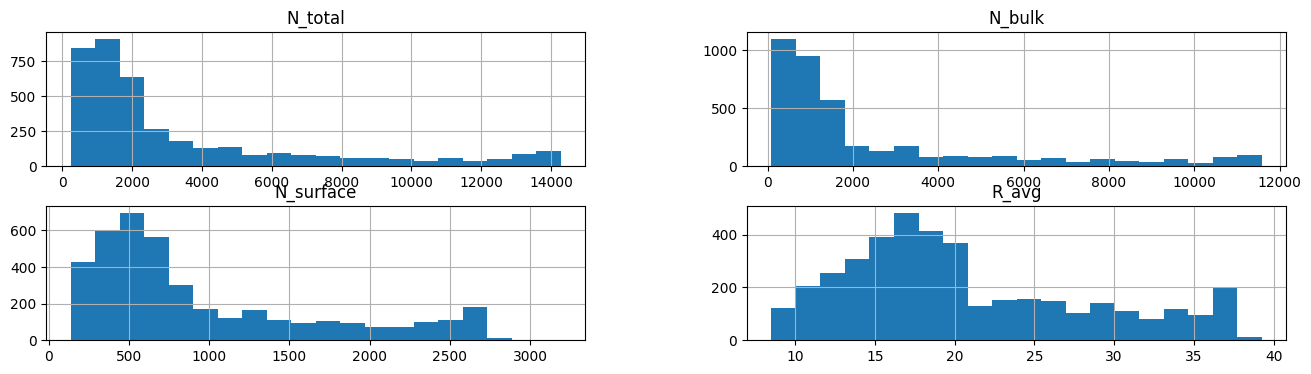

In [14]:
new_df.hist(figsize=(16,4), bins=20)
plt.show()

**Q5**

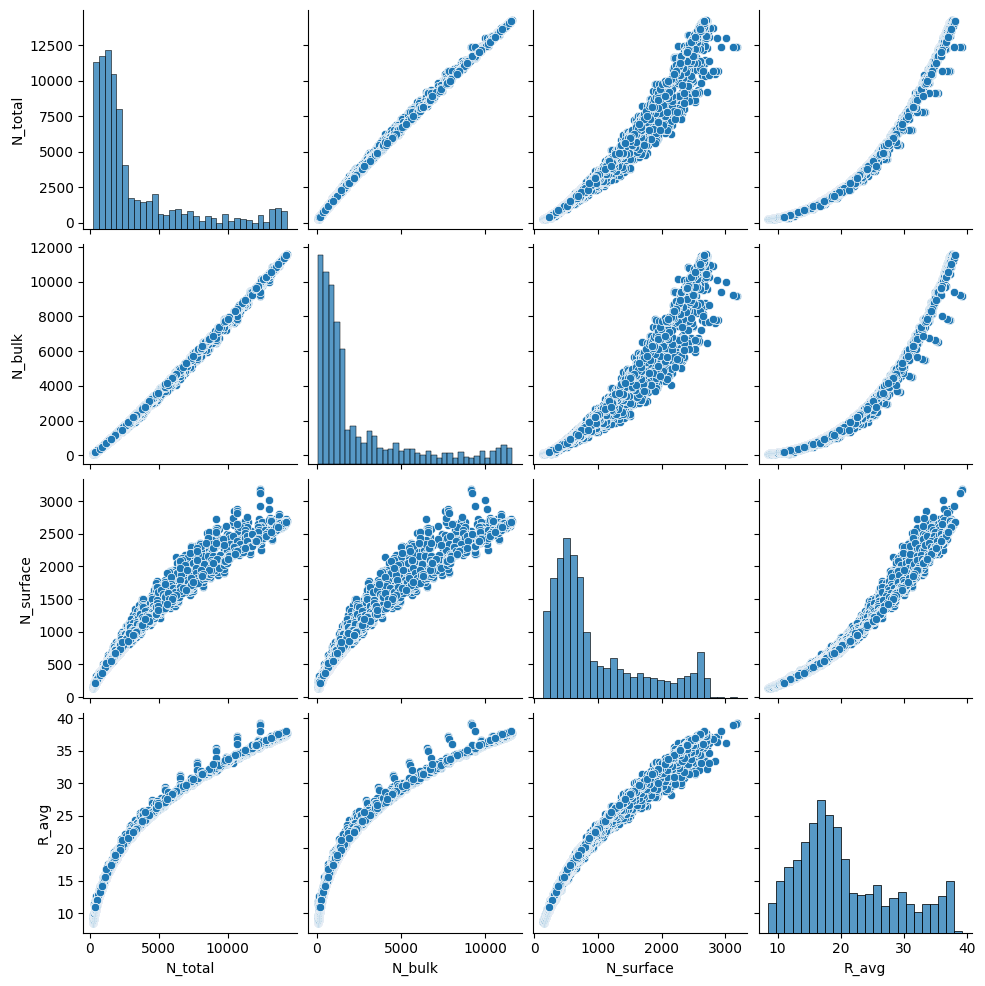

In [23]:
sns.pairplot(new_df)
plt.show()

**Q6**

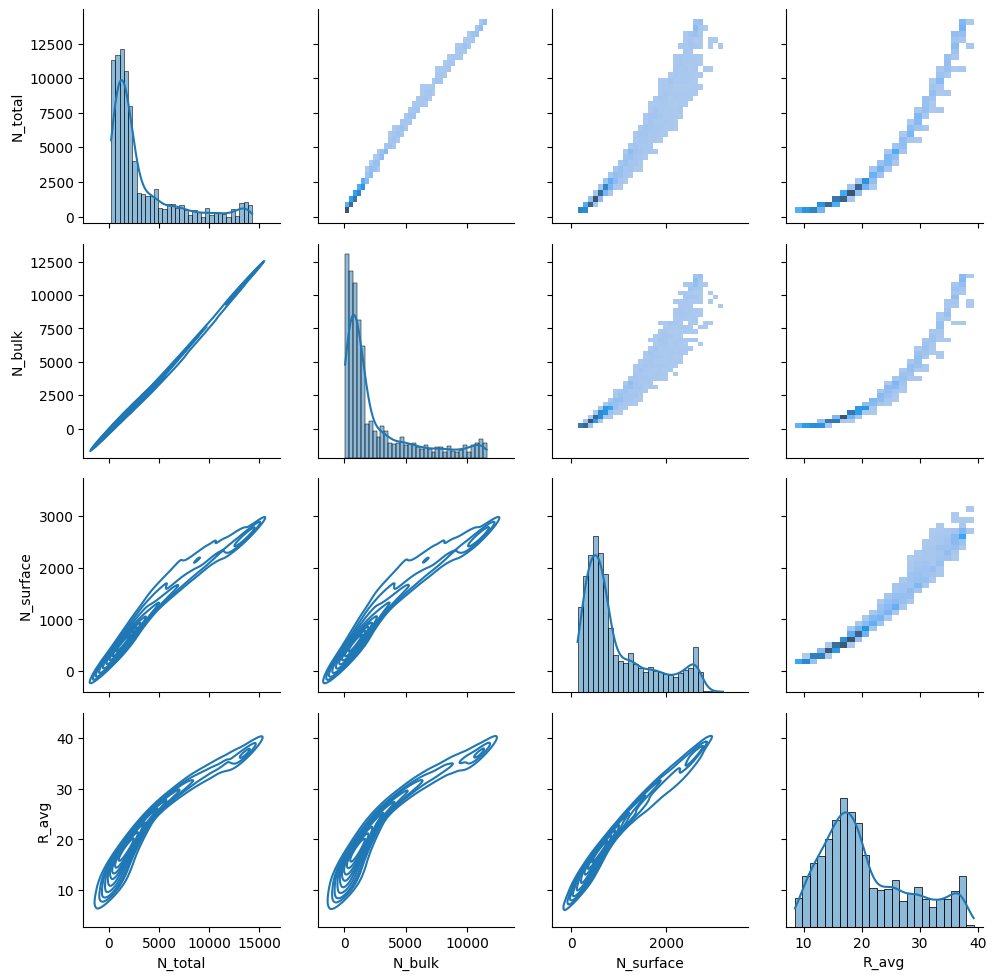

In [24]:
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)   # bivariate histogram
g.map_diag(sns.histplot, kde=True)  # histogram + KDE
g.map_lower(sns.kdeplot)    # bivariate KDE
plt.show()